В качестве итогового проекта вам предлагается решить задачу классификации на наборе данных Fashion-MNIST

Fashion-MNIST – это датасет состоящий из 70000 черно-белых изображений одежды 28х28 пикселей каждое. 60000 из них содержатся в тренировочной выборке, и 10000 – в тестовой. 

### Загрузка данных

Перед решением задачи классификации на приведенном наборе данных предлагается нормализовать данные. Датасет доступен для скачивания в формате CSV. В данном случае удобно использовать библиотеку Pandas для загрузки данных.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
np.random.seed(7)

In [ ]:
train = pd.read_csv('/fashion-mnist_train.csv')
test = pd.read_csv('/fashion-mnist_test.csv')

In [ ]:
trainLabel = train.label
testLabel = test.label
trainSeq = train.drop('label', axis=1)
testSeq = test.drop('label', axis=1)

In [ ]:
trainLabel.head()

0    2
1    9
2    6
3    0
4    3
Name: label, dtype: int64

In [ ]:
trainSeq.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0,0,0,0,0,0,5,0,0,0,105,92,101,107,100,132,0,0,2,4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,150,227,...,211.0,220.0,214.0,74.0,0.0,255.0,222.0,128.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,44.0,12.0,0.0,0.0,40.0,134.0,162.0,191.0,214.0,163.0,146.0,165.0,79.0,0.0,0.0,0.0,30.0,43.0,0.0,0.0,0.0,0.0,0.0
3,0,0,0,1,2,0,0,0,0,0,114,183,112,55,23,72,102,165,160,28,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,24,188,163,93,136,...,171.0,249.0,207.0,197.0,202.0,45.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,22.0,21.0,25.0,69.0,52.0,45.0,74.0,39.0,3.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0,0,0,0,0,0,0,0,0,0,0,0,46,0,21,68,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,25,187,189,0,...,230.0,237.0,229.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,68.0,116.0,112.0,136.0,147.0,144.0,121.0,102.0,63.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
trainSeq.shape

(8052, 784)

In [ ]:
testSeq.shape

(8039, 784)

In [ ]:
trainSeq = np.array(trainSeq).reshape(-1, 28, 28, 1)

In [ ]:
testSeq = np.array(testSeq).reshape(-1, 28, 28, 1)

In [ ]:
trainSeq.shape

(8052, 28, 28, 1)

In [ ]:
testSeq.shape

(8039, 28, 28, 1)

In [ ]:
trainSeq = trainSeq / 255.0
testSeq = testSeq / 255.0

One-hot encoding

In [ ]:
from keras.utils.np_utils import to_categorical

trainLabel = to_categorical(trainLabel, num_classes=10)
testLabel = to_categorical(testLabel, num_classes=10)

In [ ]:
trainLabel.shape

(8052, 10)

In [ ]:
testLabel.shape

(8039, 10)

In [ ]:
testLabel

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

### 1. Логистическая регрессия

Для решения задачи классификации предлагается начать с использования логистической регрессии. В данном случае, количество признаков равно 28x28=784, так же мы имеем 60000 объектов в тренировочной выборке. Поэтому рекомендуется использовать tensorflow или keras для выполнения этого задания. Используйте стохастический градиентный спуск (stochastic gradient descent) в качестве алгоритма оптимизации.

По своей сути, логистическая регрессия может быть реализована как нейронная сеть без скрытых слоев. В выходном слое содержится количество нейронов, равное количеству классов. В качестве функции активации выходного слоя следует использовать softmax.

Обучите логистическую регрессию на тренировочной выборке и оцените качество на тестовой выборке используя метрику accuracy. Постройте график качества модели на валидационной выборке от количества эпох. Для этого вы можете использовать утилиту tensorboard.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import SGD

In [ ]:
epochs = 30
batchSize = 256
learningRate = 0.001
numClasses = 10

In [ ]:
model1 = Sequential([
    Flatten(input_shape=(28, 28, 1)),
    Dense(numClasses, activation='softmax', use_bias=True)
])

In [ ]:
optimizer = SGD(
    learning_rate=0.01,
    momentum=0.9,
    nesterov=False,
    name='SGD'
)

model1.compile(optimizer=optimizer,
               loss='mse',
               metrics=['accuracy'])

model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


Keras может разделить часть обучающих данных в валидационный набор данных и оценивать производительность модели на этом валидационном наборе данных каждую эпоху при использовании параметра validation_split.

In [ ]:
history1 = model1.fit(
    trainSeq,
    trainLabel,
    batch_size=batchSize,
    epochs=epochs,
    validation_split=0.2
)

Epoch 1/30
26/26 [==============================] - 0s 7ms/step - loss: 0.0918 - accuracy: 0.1110 - val_loss: nan - val_accuracy: 0.1477
Epoch 2/30
26/26 [==============================] - 0s 3ms/step - loss: 0.0875 - accuracy: 0.2130 - val_loss: nan - val_accuracy: 0.2880
Epoch 3/30
26/26 [==============================] - 0s 3ms/step - loss: 0.0840 - accuracy: 0.3017 - val_loss: nan - val_accuracy: 0.3364
Epoch 4/30
26/26 [==============================] - 0s 3ms/step - loss: 0.0811 - accuracy: 0.3335 - val_loss: nan - val_accuracy: 0.3774
Epoch 5/30
26/26 [==============================] - 0s 3ms/step - loss: 0.0785 - accuracy: 0.3796 - val_loss: nan - val_accuracy: 0.4153
Epoch 6/30
26/26 [==============================] - 0s 3ms/step - loss: 0.0760 - accuracy: 0.4237 - val_loss: nan - val_accuracy: 0.4482
Epoch 7/30
26/26 [==============================] - 0s 4ms/step - loss: 0.0736 - accuracy: 0.4465 - val_loss: nan - val_accuracy: 0.4662
Epoch 8/30
26/26 [=======================

In [ ]:
accuracy = model1.evaluate(testSeq, testLabel, verbose=2)
print('Accuracy on test data: ', accuracy[1])

252/252 - 0s - loss: nan - accuracy: 0.6816
Accuracy on test data:  0.6815524101257324


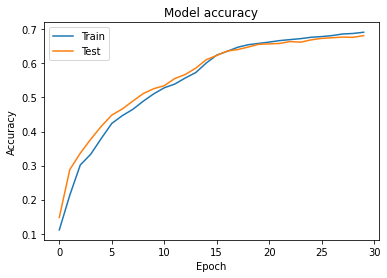

In [ ]:
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

Качество на тестовой выборке составляет 68%. Модель сделала все возможное. Линейная регрессия направлена на поиск зависимости целевой переменной от одной или нескольких независимых переменных.

### 2. Полносвязная нейронная сеть

Далее, попробуйте реализовать полносвязную нейронную сеть с несколькими скрытыми слоями. Обучите модель и посчитайте качество на тестовой выборке. Как оно изменилось в сравнении с логистической регрессией? Как вы можете объяснить этот результат?

In [ ]:
from tensorflow.keras.layers import Dropout

In [ ]:
model2 = Sequential([
    Flatten(input_shape=(28, 28, 1)),
    Dense(512, activation='relu'),
    Dropout(0.2),
    Dense(256, activation='relu'),
    Dropout(0.2),
    Dense(numClasses, activation='softmax')
])
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                2570      
Total params: 535,818
Trainable params: 535,818
Non-trainable params: 0
________________________________________________

In [ ]:
model2.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [ ]:
history2 = model2.fit(
    trainSeq,
    trainLabel,
    batch_size=batchSize,
    epochs=epochs,
    validation_split=0.2
)

Epoch 1/30
26/26 [==============================] - 0s 8ms/step - loss: 1.0262 - accuracy: 0.6421 - val_loss: 0.6315 - val_accuracy: 0.7635
Epoch 2/30
26/26 [==============================] - 0s 4ms/step - loss: 0.6120 - accuracy: 0.7803 - val_loss: 0.5358 - val_accuracy: 0.8101
Epoch 3/30
26/26 [==============================] - 0s 4ms/step - loss: 0.5205 - accuracy: 0.8197 - val_loss: 0.4901 - val_accuracy: 0.8281
Epoch 4/30
26/26 [==============================] - 0s 4ms/step - loss: 0.4830 - accuracy: 0.8280 - val_loss: 0.4845 - val_accuracy: 0.8299
Epoch 5/30
26/26 [==============================] - 0s 4ms/step - loss: 0.4379 - accuracy: 0.8413 - val_loss: 0.4531 - val_accuracy: 0.8305
Epoch 6/30
26/26 [==============================] - 0s 4ms/step - loss: 0.4164 - accuracy: 0.8548 - val_loss: 0.4463 - val_accuracy: 0.8399
Epoch 7/30
26/26 [==============================] - 0s 4ms/step - loss: 0.4031 - accuracy: 0.8500 - val_loss: 0.4586 - val_accuracy: 0.8336
Epoch 8/30
26/26 [==

In [ ]:
accuracy2 = model2.evaluate(testSeq, testLabel, verbose=2)
print('Accuracy on test data: ', accuracy2[1])

252/252 - 1s - loss: 0.5179 - accuracy: 0.8395
Accuracy on test data:  0.8395322561264038


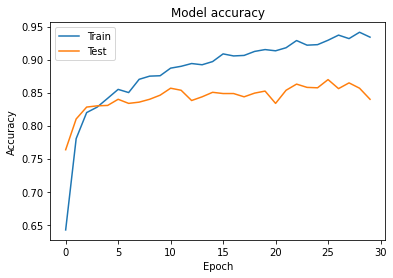

In [ ]:
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

Сейчас мы имеем дело с более серьезной нейросетью. Ее качество составляет 83%, что больше, чем качество, которое показала линейная регрессия. Здесь мы использовали оптимизатор Адам, который является некой оптимизацией стохастического градиентного спуска, также, чтобы предотвратить переобучение применили несколько слоев Dropout, при котором случайно выбранные нейроны игнорируются во время обучения.

### 3. Сверточная нейронная сеть

После этого вам предлагается реализовать сверточную нейронную сеть. В данном случае лучше использовать готовые слои, которые предоставляют keras или tensorflow.

Начните с модели с несколькими сверточными слоями. Так же рекомендуется использовать слои суб-дискретизации, например Max Pooling слои. Они понижают размерность сходных данных и выделяют наиболее важные признаки из данных. Посчитайте качество получившейся модели на тестовой выборке. Сравните полученные результаты с результатами полносвязной нейронной сети.

In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D

In [ ]:
model3 = Sequential([
    Conv2D(32, kernel_size=(3, 3), padding='same',activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    
    Conv2D(64, kernel_size=(3, 3), padding='same',activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.2),
    Dense(numClasses, activation='softmax')
])
model3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 512)               1606144   
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)              

In [ ]:
model3.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [ ]:
history3 = model3.fit(
    trainSeq,
    trainLabel,
    batch_size=batchSize,
    epochs=epochs,
    validation_split=0.2
)

Epoch 1/30
26/26 [==============================] - 0s 16ms/step - loss: 1.0652 - accuracy: 0.6207 - val_loss: 0.6483 - val_accuracy: 0.7623
Epoch 2/30
26/26 [==============================] - 0s 8ms/step - loss: 0.6036 - accuracy: 0.7797 - val_loss: 0.5303 - val_accuracy: 0.7983
Epoch 3/30
26/26 [==============================] - 0s 8ms/step - loss: 0.5222 - accuracy: 0.8042 - val_loss: 0.4537 - val_accuracy: 0.8367
Epoch 4/30
26/26 [==============================] - 0s 8ms/step - loss: 0.4684 - accuracy: 0.8258 - val_loss: 0.4300 - val_accuracy: 0.8405
Epoch 5/30
26/26 [==============================] - 0s 9ms/step - loss: 0.4139 - accuracy: 0.8520 - val_loss: 0.4024 - val_accuracy: 0.8485
Epoch 6/30
26/26 [==============================] - 0s 8ms/step - loss: 0.3743 - accuracy: 0.8593 - val_loss: 0.3847 - val_accuracy: 0.8560
Epoch 7/30
26/26 [==============================] - 0s 8ms/step - loss: 0.3491 - accuracy: 0.8649 - val_loss: 0.3962 - val_accuracy: 0.8479
Epoch 8/30
26/26 [=

In [ ]:
accuracy3 = model3.evaluate(testSeq, testLabel, verbose=2)
print('Accuracy on test data: ', accuracy3[1])

252/252 - 1s - loss: 0.3850 - accuracy: 0.8815
Accuracy on test data:  0.8814529180526733


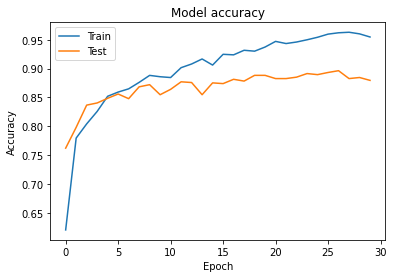

In [ ]:
plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

По сравнению с обычной полносвязной нейронной сетью эта нейросетка показала лучшие результаты. Качество в 88% против 83%. Также хотелось бы отметить, что сверточная сеть достигла качества в 88% уже на 17 эпохе, в то время как полносвязная нейросеть показывала 84% на этой же эпохе. 


Далее, попробуйте увеличить количество слоев в вашей нейронной сети. Достаточно добавить несколько новых сверточных слоев. Проанализируете, как изменилось качество в этом случае.


In [ ]:
model4 = Sequential([
    Conv2D(32, kernel_size=(3, 3), padding='same',activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    
    Conv2D(64, kernel_size=(3, 3), padding='same',activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    
    Conv2D(124, kernel_size=(3, 3), padding='same',activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    
    Conv2D(256, kernel_size=(3, 3), padding='same',activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),


    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.2),
    Dense(numClasses, activation='softmax')
])
model4.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 7, 7, 124)         71548     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 3, 3, 124)         0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 3, 3, 256)        

In [ ]:
model4.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [ ]:
history4 = model4.fit(
    trainSeq,
    trainLabel,
    batch_size=batchSize,
    epochs=epochs,
    validation_split=0.2
)

Epoch 1/30
26/26 [==============================] - 0s 19ms/step - loss: 1.5420 - accuracy: 0.4102 - val_loss: 0.9662 - val_accuracy: 0.6027
Epoch 2/30
26/26 [==============================] - 0s 11ms/step - loss: 0.8332 - accuracy: 0.6841 - val_loss: 0.7142 - val_accuracy: 0.7325
Epoch 3/30
26/26 [==============================] - 0s 11ms/step - loss: 0.6911 - accuracy: 0.7384 - val_loss: 0.5901 - val_accuracy: 0.7697
Epoch 4/30
26/26 [==============================] - 0s 11ms/step - loss: 0.5913 - accuracy: 0.7755 - val_loss: 0.5462 - val_accuracy: 0.7840
Epoch 5/30
26/26 [==============================] - 0s 11ms/step - loss: 0.5265 - accuracy: 0.8048 - val_loss: 0.5037 - val_accuracy: 0.8032
Epoch 6/30
26/26 [==============================] - 0s 11ms/step - loss: 0.4833 - accuracy: 0.8190 - val_loss: 0.4698 - val_accuracy: 0.8293
Epoch 7/30
26/26 [==============================] - 0s 11ms/step - loss: 0.4664 - accuracy: 0.8267 - val_loss: 0.4489 - val_accuracy: 0.8287
Epoch 8/30
26

In [ ]:
accuracy4 = model4.evaluate(testSeq, testLabel, verbose=2)
print('Accuracy on test data: ', accuracy4[1])

252/252 - 1s - loss: 0.3763 - accuracy: 0.8828
Accuracy on test data:  0.882821261882782


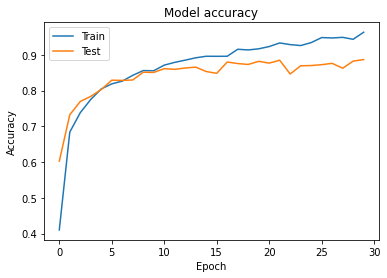

In [ ]:
plt.plot(history4.history['accuracy'])
plt.plot(history4.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

В моем случае добавление еще нескольких слоев свертки не улучшило качество, если только на совсем немного. Но судя по графикам, то у этой модели обучение прошло лучше.

В заключение, рекомендуется попробовать добавить Batch Normalization слои. Обычно они располагаются после сверточных слоев или слоев полносвязной нейронной сети. Обычно они улучшают качество модели, этим объясняется их популярность использования в современных архитектурах нейронных сетей. Однако, это требует проверки для конкретной модели и конкретного набора данных.

In [ ]:
from tensorflow.keras.layers import BatchNormalization

In [ ]:
model5 = Sequential([
    Conv2D(32, kernel_size=(3, 3), padding='same',activation='relu', input_shape=(28, 28, 1)),
    BatchNormalization(axis=1),
    MaxPooling2D(pool_size=(2, 2)),
    
    Conv2D(124, kernel_size=(3, 3), padding='same',activation='relu'),
    BatchNormalization(axis=1),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(124, kernel_size=(3, 3), padding='same',activation='relu'),
    BatchNormalization(axis=1),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(124, kernel_size=(3, 3), padding='same',activation='relu'),
    BatchNormalization(axis=1),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.2),
    Dense(numClasses, activation='softmax')
])
model5.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
batch_normalization_2 (Batch (None, 28, 28, 32)        112       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 14, 14, 124)       35836     
_________________________________________________________________
batch_normalization_3 (Batch (None, 14, 14, 124)       56        
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 7, 7, 124)         0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 7, 7, 124)        

In [ ]:
model5.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [ ]:
history5 = model4.fit(
    trainSeq,
    trainLabel,
    batch_size=batchSize,
    epochs=epochs,
    validation_split=0.2
)

Epoch 1/30
26/26 [==============================] - 0s 15ms/step - loss: 0.0463 - accuracy: 0.9846 - val_loss: 0.5155 - val_accuracy: 0.8796
Epoch 2/30
26/26 [==============================] - 0s 11ms/step - loss: 0.0514 - accuracy: 0.9803 - val_loss: 0.5133 - val_accuracy: 0.8870
Epoch 3/30
26/26 [==============================] - 0s 11ms/step - loss: 0.0376 - accuracy: 0.9876 - val_loss: 0.5095 - val_accuracy: 0.8932
Epoch 4/30
26/26 [==============================] - 0s 11ms/step - loss: 0.0481 - accuracy: 0.9820 - val_loss: 0.4535 - val_accuracy: 0.8908
Epoch 5/30
26/26 [==============================] - 0s 11ms/step - loss: 0.0302 - accuracy: 0.9910 - val_loss: 0.5001 - val_accuracy: 0.8852
Epoch 6/30
26/26 [==============================] - 0s 11ms/step - loss: 0.0328 - accuracy: 0.9901 - val_loss: 0.5755 - val_accuracy: 0.8759
Epoch 7/30
26/26 [==============================] - 0s 11ms/step - loss: 0.0429 - accuracy: 0.9834 - val_loss: 0.5142 - val_accuracy: 0.8833
Epoch 8/30
26

In [ ]:
accuracy5 = model5.evaluate(testSeq, testLabel, verbose=2)
print('Accuracy on test data: ', accuracy5[1])

252/252 - 1s - loss: 2.3019 - accuracy: 0.1000
Accuracy on test data:  0.10001243650913239


Постройте график качества модели на валидационной выборке от количества эпох. Для этого вы можете использовать утилиту tensorboard.

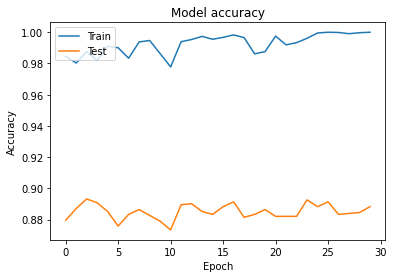

In [ ]:
plt.plot(history5.history['accuracy'])
plt.plot(history5.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

К моему удивлению, последняя нейросетка показывает наихудшие результаты на валидационных данных, но очень хорошие показатели на тренировочной выборке из-за своих модификаций. Батч нормализация ускоряет процесс обучение и регуляризирует параметры, позволяет не переобучаться на данных. Но очевидно, что получилось как раз наоборот. Модель переобучилась на тренировочных данных и на тестовых данных показывает низкое качества, ровно также как и на валидационных.